In [5]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/Agriculture Data.xlsx - Sheet1.csv')

X = pd.DataFrame(dataset.iloc[:,0:11].values)
Y = pd.DataFrame(dataset.iloc[:,11:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,0:11])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10
0      3   2   2  25  26   9   0   0   0   0   0
1      3   3   1  61  17   9   0   0   0   0   0
2      3   3   1  65  16   9   0   0   0   0   0
3      3   2   1  49  17   9   0   0   0   1   0
4      3   1   1  59  28   9   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2416   1   1   1  50  25   9   0   0   0   0   0
2417   1   2   1  58  49   8   0   0   0   0   0
2418   1   2   1   3  36   9   0   0   0   0   0
2419   3   2   2  48  40   9   0   0   0   0   0
2420   1   1   1  81  37   7   0   0   0   0   0

[2421 rows x 11 columns]
      0
0     0
1     1
2     1
3     0
4     1
...  ..
2416  1
2417  0
2418  1
2419  0
2420  1

[2421 rows x 1 columns]
(1936, 11)
(1936, 1)
Index(['Location of Incident', 'Time', 'Sex', 'Age', 'State', 'Injury Agent ',
       'Confined Space', 'Grain Involved', 'Alcohol/Drugs', 'Seatbelt',
       'Helmet'],
      dtype='object')


In [6]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

In [7]:
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
from sklearn.metrics import roc_auc_score

In [8]:
def objective(n_estimators, max_depth, min_samples_split, max_features):
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                  max_depth=int(max_depth),
                                  min_samples_split=int(min_samples_split),
                                  max_features=min(max_features, 0.999),  # Fraction, must be <= 1.0
                                  random_state=42)
    
    return cross_val_score(model, X_train, Y_train, cv=10,scoring = 'roc_auc').mean()
param_bounds = {
    'n_estimators': (10, 250),
    'max_depth': (1, 100),
    'min_samples_split': (2, 50),
    'max_features': (0.1, 0.999),
}
optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)
best_params = optimizer.max['params']


|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 1         | 0.6024    | 38.08     | 0.9547    | 37.14     | 153.7     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 2         | 0.5911    | 16.45     | 0.2402    | 4.788     | 217.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 3         | 0.5597    | 60.51     | 0.7366    | 2.988     | 242.8     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 4         | 0.5883    | 83.41     | 0.2909    | 10.73     | 54.02     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 5         | 0.5967    | 31.12     | 0.5718    | 22.73     | 79.89     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 6         | 0.6081    | 39.31     | 0.5163    | 37.01     | 153.6     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 7         | 0.6149    | 44.78     | 0.1       | 36.47     | 153.1     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 8         | 0.6161    | 43.78     | 0.1       | 38.88     | 145.2     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 9         | 0.6151    | 43.73     | 0.1       | 29.06     | 145.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 10        | 0.6152    | 53.13     | 0.1       | 33.51     | 140.3     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 11        | 0.6154    | 43.39     | 0.1       | 33.04     | 133.1     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 12        | 0.6187    | 50.1      | 0.1       | 44.71     | 132.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 13        | 0.6094    | 55.75     | 0.529     | 36.3      | 125.2     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 14        | 0.6209    | 55.3      | 0.1       | 49.58     | 143.4     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 15        | 0.6213    | 63.76     | 0.1       | 49.66     | 134.7     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 16        | 0.6189    | 67.86     | 0.1       | 43.86     | 145.5     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 17        | 0.6232    | 78.38     | 0.1       | 50.0      | 136.5     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 18        | 0.6054    | 75.74     | 0.653     | 38.08     | 132.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 19        | 0.6219    | 81.07     | 0.1       | 50.0      | 148.7     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 20        | 0.6161    | 91.96     | 0.3886    | 50.0      | 140.0     |


In [9]:
model = RandomForestClassifier(n_estimators=int(best_params['n_estimators']),
                                   max_depth=int(best_params['max_depth']),
                                   min_samples_split=int(best_params['min_samples_split']),
                                   max_features=best_params['max_features'],
                                   random_state=42)
model.fit(X_train,Y_train)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=78, max_features=0.1, min_samples_split=50,
                       n_estimators=136, random_state=42)

In [10]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
      0
1931  1

[[ 17 127]
 [ 11 330]]


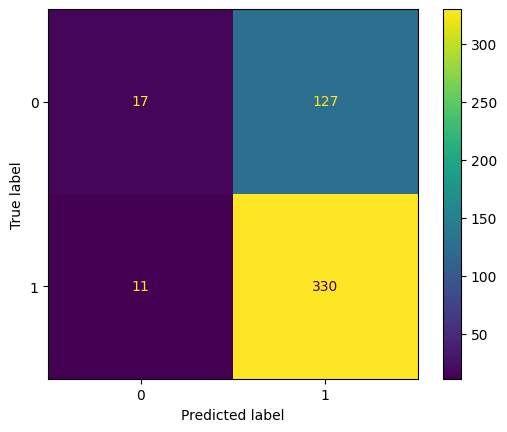

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
print(confusionmatrix)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()

PermutationExplainer explainer: 486it [01:18,  5.63it/s]                         


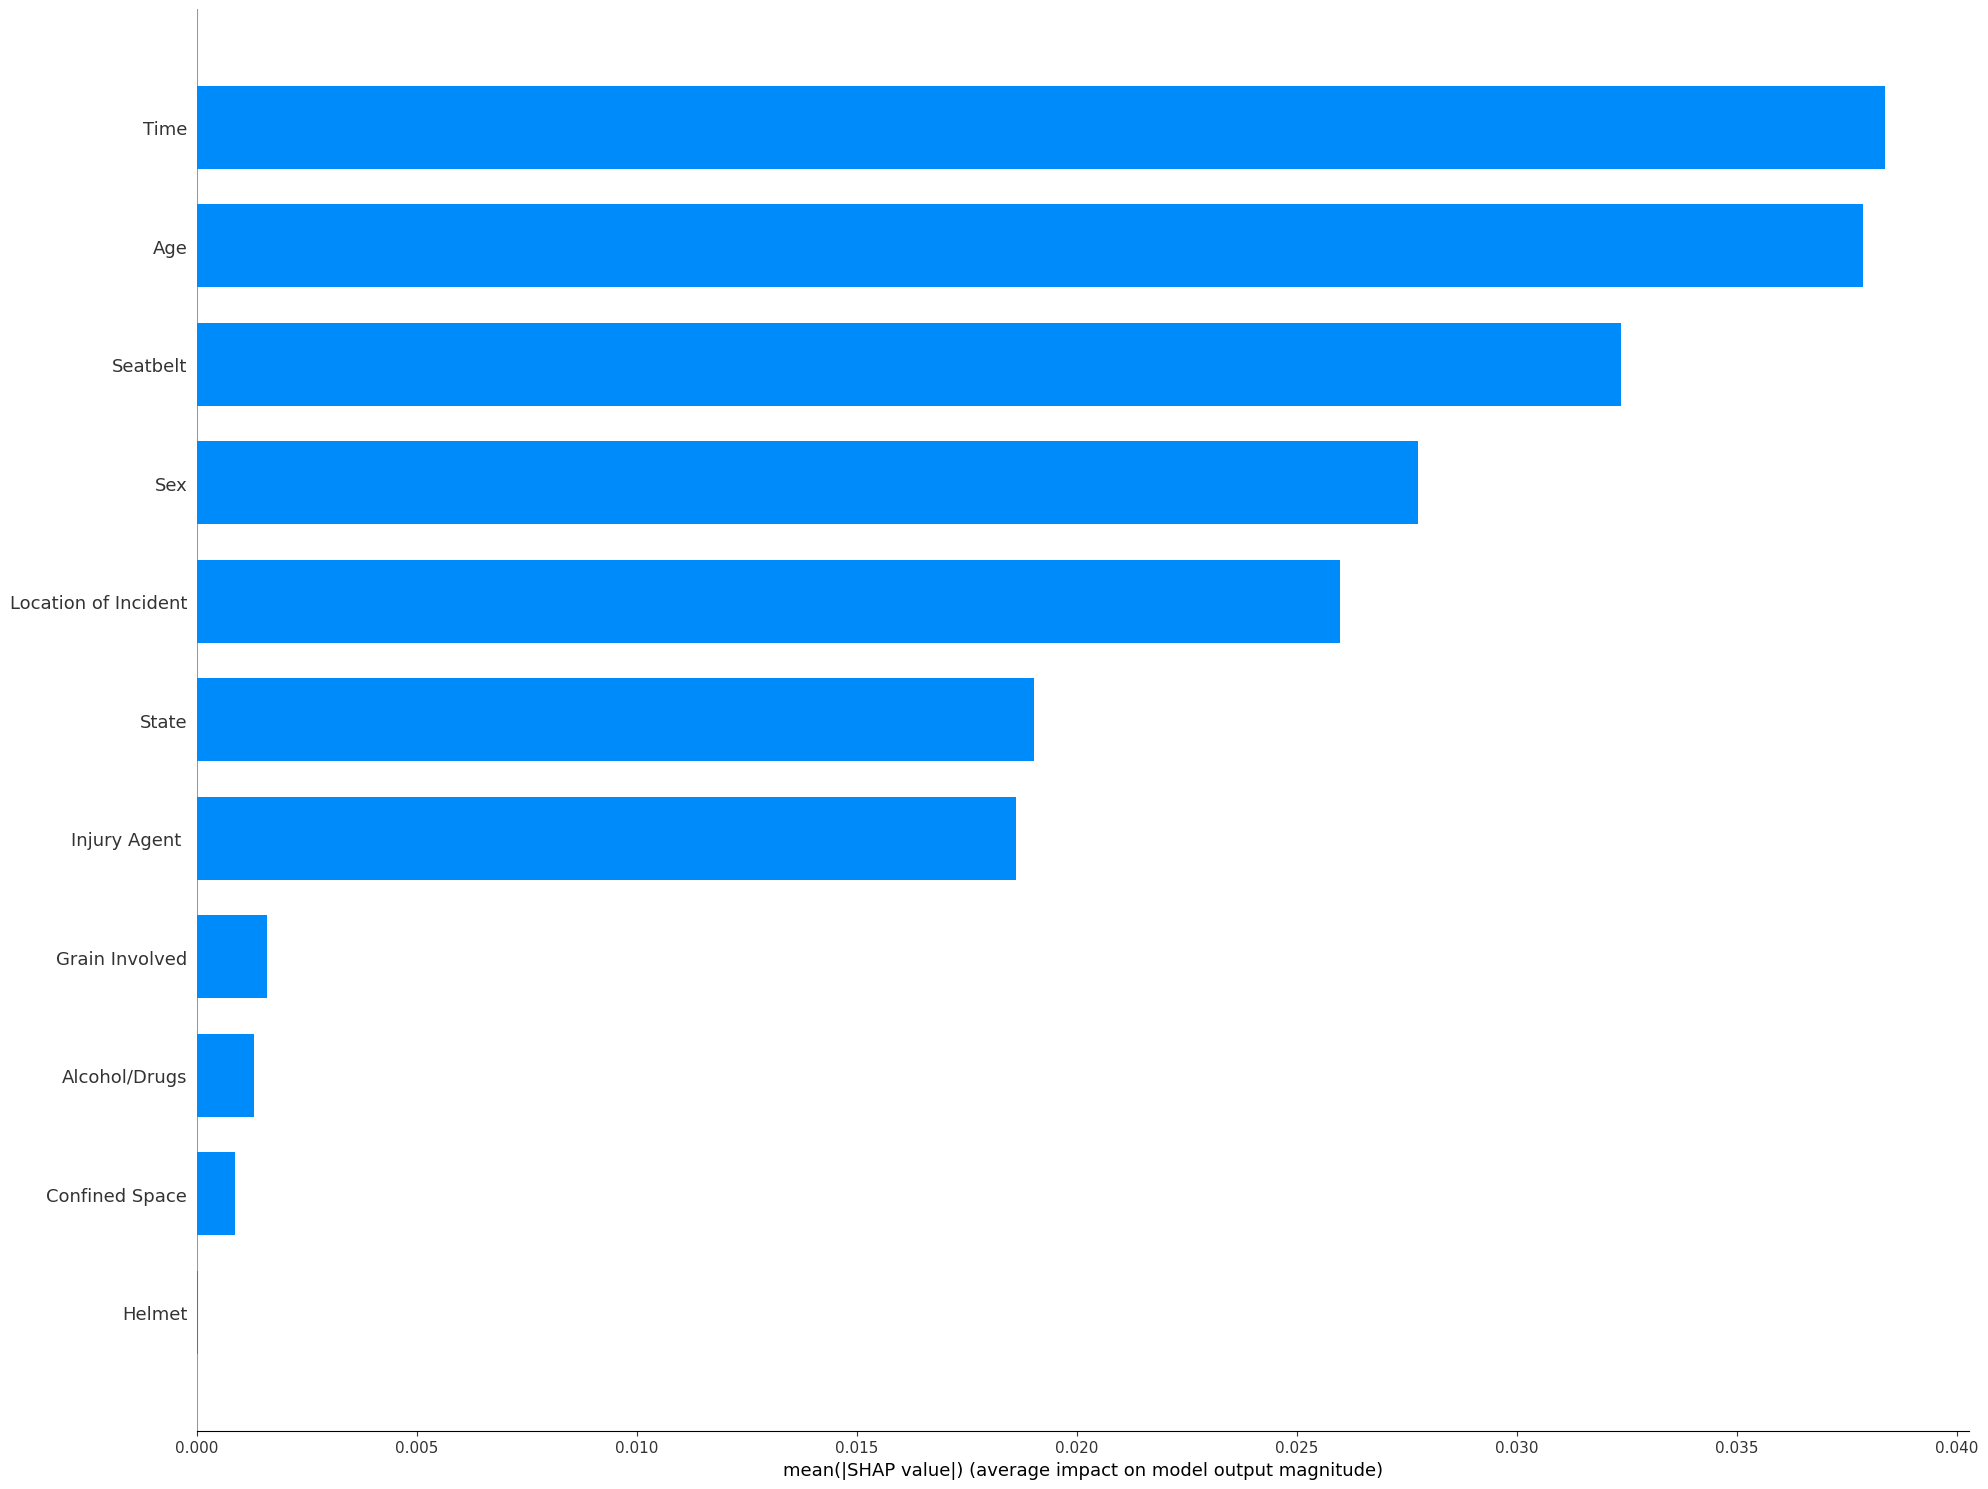

In [12]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

In [13]:
# shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)